In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Annual Income (k$)')

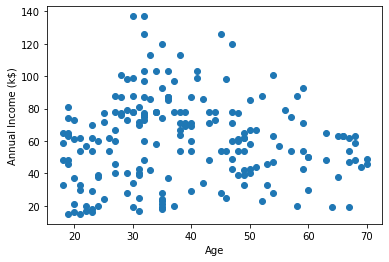

In [6]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

Text(0, 0.5, 'Spending Score (1-100)')

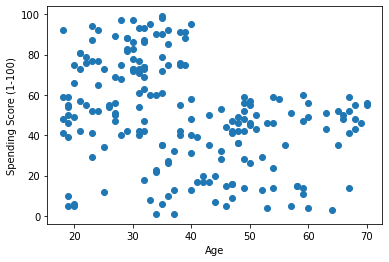

In [7]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Spending Score (1-100)')

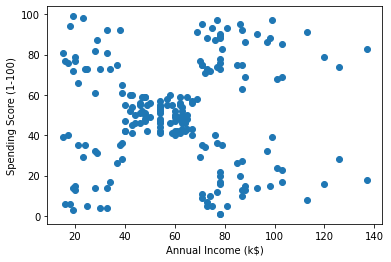

In [8]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [9]:
df.drop('CustomerID',axis=1,inplace=True)
df['Genre'] = pd.get_dummies(df['Genre'],drop_first=True)

In [10]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df)

StandardScaler()

In [14]:
scaled_data = scaler.transform(df)

In [15]:
from sklearn.cluster import KMeans

In [16]:
def elbow_plot(data,max_k):
    k_vals = []
    inertia = []
    for i in range(1,max_k+1):
        k_vals.append(i)
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.scatter(k_vals,inertia)
    plt.xlabel('K')
    plt.ylabel('Inertia')

C:\Users\SOUVIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


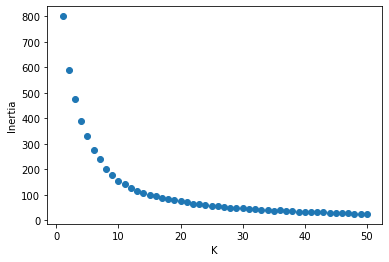

In [17]:
elbow_plot(scaled_data,50)

In [18]:
kmeans = KMeans(n_clusters=10)

In [19]:
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

In [20]:
kmeans.labels_

array([0, 0, 7, 2, 7, 2, 7, 2, 4, 2, 4, 2, 7, 2, 7, 0, 7, 0, 4, 2, 0, 0,
       7, 0, 7, 0, 7, 0, 7, 2, 4, 2, 4, 0, 7, 2, 7, 2, 7, 2, 1, 0, 4, 2,
       7, 2, 1, 3, 3, 3, 1, 0, 3, 4, 1, 4, 1, 4, 3, 4, 4, 0, 1, 1, 4, 0,
       1, 1, 0, 3, 4, 1, 1, 1, 4, 0, 1, 0, 3, 1, 4, 0, 4, 1, 3, 4, 1, 3,
       3, 1, 1, 0, 4, 3, 3, 0, 1, 3, 4, 0, 3, 1, 4, 0, 4, 3, 1, 4, 4, 4,
       4, 3, 3, 0, 3, 3, 1, 1, 1, 1, 0, 3, 3, 5, 3, 8, 6, 5, 4, 5, 6, 5,
       3, 8, 6, 8, 9, 5, 6, 8, 9, 5, 3, 8, 6, 5, 6, 8, 9, 5, 6, 5, 9, 8,
       9, 8, 6, 8, 6, 8, 9, 8, 6, 8, 6, 8, 6, 8, 9, 5, 6, 5, 6, 5, 9, 8,
       6, 5, 6, 5, 9, 8, 6, 8, 9, 5, 9, 5, 9, 8, 9, 8, 6, 8, 9, 8, 9, 5,
       6, 5])

Text(0, 0.5, 'Spending Score (1-100)')

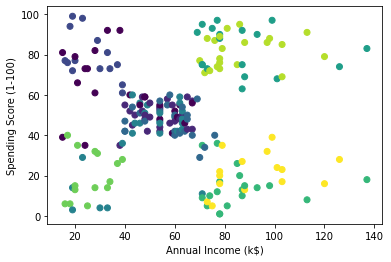

In [21]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=kmeans.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')